In [1]:
import wandb
import numpy as np
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [85]:
#can use api to get run ids but have just donwloaded the flat cvs file instead. 
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("aaronwtr/perturbench")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

#runs_df.to_csv("project.csv")

In [94]:
runs_df['summary']

0     {'test/de_genes': 20, 'trainer/global_step': 0...
1     {'epoch': 0, '_wandb': {'runtime': 39}, 'train...
2     {'_step': 180, 'lr-Adam': 5e-06, 'test/mse': 0...
3     {'epoch': 60, '_wandb': {'runtime': 45}, 'lr-A...
4     {'_wandb': {'runtime': 47}, '_runtime': 48.478...
5     {'lr-Adam': 5e-06, 'val/mse': 0.06117557361721...
6     {'trainer/global_step': 4200, 'lr-Adam': 5e-06...
7     {'epoch': 60, '_wandb': {'runtime': 60}, 'val/...
8     {'epoch': 8, '_wandb': {'runtime': 29}, '_step...
9     {'trainer/global_step': 7440, '_step': 180, 'l...
10    {'_step': 180, 'epoch': 60, 'val/mse': 0.06122...
11    {'test/mse': 0.07244981825351715, 'trainer/glo...
12    {'lr-Adam': 5e-06, '_runtime': 204.17654705047...
13    {'val/mse': 0.0611756406724453, '_runtime': 18...
14    {'epoch': 60, 'lr-Adam': 5e-05, 'val/mse': 0.0...
15    {'_runtime': 416.5194094181061, 'test/mse': 0....
16    {'epoch': 60, 'val/mse': 0.06006554886698723, ...
17    {'lr-Adam': 5e-06, 'val/mse': 0.0586851574

In [95]:
df = pd.read_csv('wandb_baseline.csv')
df

,Name,Created,Group,Tags,test/mse,test_baseline/mse,test_de/mse,train/mse,val/mse
0,youthful-hill-37,2024-06-05T02:28:56.000Z,test_mlp_norman_0.0,"SLC4A1_de, eval, mlp, norman, replicate_0, spl...",NaN,0.383467,0.370128,NaN,NaN
1,lemon-vortex-33,2024-06-05T02:13:27.000Z,test_mlp_norman_0.0,"SET_de, eval, mlp, norman, replicate_0, split_0.0",NaN,0.300423,0.296696,NaN,NaN
2,prime-disco-230,2024-06-04T01:09:47.000Z,mlp_norman_0.8,"mlp, norman, replicate_1, split_0.8",0.071544,NaN,NaN,0.060080,0.057698
3,eternal-sun-229,2024-06-04T01:09:13.000Z,mlp_norman_0.8,"mlp, norman, replicate_0, split_0.8",0.063389,NaN,NaN,0.075439,0.076257
4,neat-thunder-228,2024-06-04T01:08:39.000Z,mlp_norman_0.8,"mlp, norman, replicate_2, split_0.8",0.055903,NaN,NaN,0.070466,0.068508
5,jumping-star-227,2024-06-04T01:08:22.000Z,mlp_norman_0.7,"mlp, norman, replicate_1, split_0.7",0.079012,NaN,NaN,0.060670,0.061176
6,sunny-energy-226,2024-06-04T01:07:56.000Z,mlp_norman_0.7,"mlp, norman, replicate_0, split_0.7",0.091801,NaN,NaN,0.053304,0.054581
7,ruby-vortex-225,2024-06-04T01:07:16.000Z,mlp_norman_0.7,"mlp, norman, replicate_2, split_0.7",0.083972,NaN,NaN,0.056957,0.058735
8,smart-resonance-224,2024-06-04T01:06:25.000Z,mlp_norman_0.6,"mlp, norman, replicate_2, split_0.6",NaN,NaN,NaN,0.057406,0.058522
9,faithful-microwave-223,2024-06-04T01:06:15.000Z,mlp_norman_0.6,"mlp, norman, replicate_1, split_0.6",0.061875,NaN,NaN,0.062453,0.064194


plt.style.use("seaborn")

## MSE plots for spectral params

In [61]:
spectral_params = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7'] #'0.8']
def find_mets_by_spectral_params(model, metric_name):
    '''find tabular metrics grouped by the spectral params'''
    met_by_sp = {}
    for sp in spectral_params:
        sp_sub = df[df['Group'] == f'{model}_{sp}']
        met_by_sp[f'{model}_{sp}'] = sp_sub[metric_name].values
    return pd.DataFrame(met_by_sp)

def find_spectral_auc(metric_df):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    return auc(x, y)

def plot_spectral_curve(metric_df, err='standard_error', zero_ylb=False, shading=True, errbar=True):
    x = np.array(spectral_params, dtype='float')
    y = metric_df.mean()
    if err == 'standard_error':
        yerr = metric_df.std() / (len(metric_df) ** 0.5 ) #Standard error for err bar 
    
    if errbar: #safe to remove if we go with fill_between for errors
        plt.errorbar(x, y, yerr=yerr, color='k', capsize = 3,elinewidth=1.5, linewidth=1.0)    
    else:
        plt.plot(x, y, color='k', linestyle='dashed', marker='o', linewidth=0.5)
        y_lower = y - yerr
        y_upper = y + yerr
        plt.fill_between(x, y_lower, y_upper, color='#D1E7FF', alpha=0.8, edgecolor='#aad3ff')
    axes = plt.gca()
    y_min, _ = axes.get_ylim()
    #
    if zero_ylb:
        y_min = 0
    if shading:
        plt.fill_between(x=x, y1=y, y2=y_min, color= "#D1E7FF", alpha=1.0)
    plt.xlabel('Spectral Parameter')
    plt.ylabel('MSE')

In [62]:
model = 'mlp_norman' #as named in Group col in df above
metric_name  = 'test/mse' #name of col for metric of intrest
test_mse = find_mets_by_spectral_params(model, metric_name)
find_spectral_auc(test_mse)

0.046100281334171656

In [63]:
plt.style.use('default')

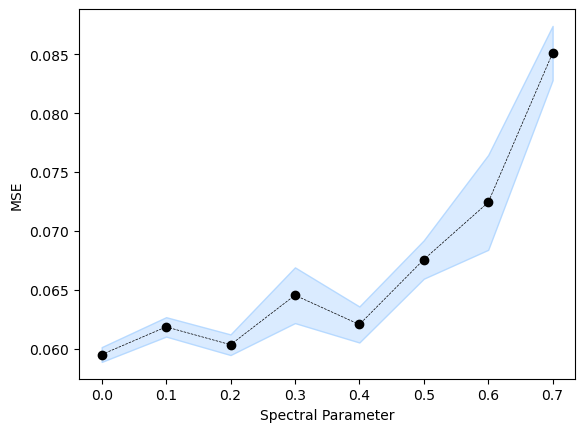

In [64]:
#current plot that we think well use
plot_spectral_curve(test_mse, shading=False, errbar=False)

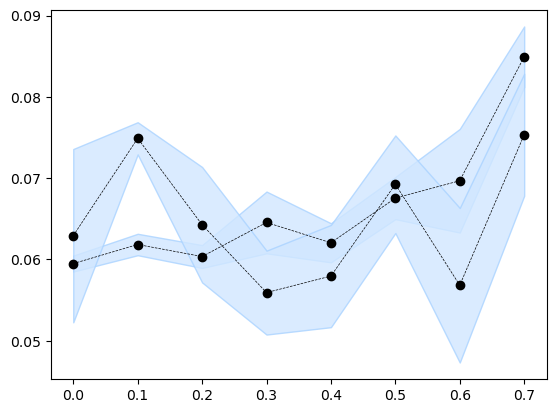

In [171]:
#can add multiple curves to the same plot as an example here we add a bit of noise to current results
#would need to sort the colors out with the overlaps. 
plot_spectral_curve(test_mse, shading=False, errbar=False)

noise_scale = 0.01  # Scale of the noise
noise = np.random.normal(0, noise_scale, test_mse.shape)
test_mse + noise
plot_spectral_curve(test_mse + noise, shading=False, errbar=False)

In [145]:
plt.style.use("seaborn")

C:\Users\Nik\AppData\Local\Temp\ipykernel_5624\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


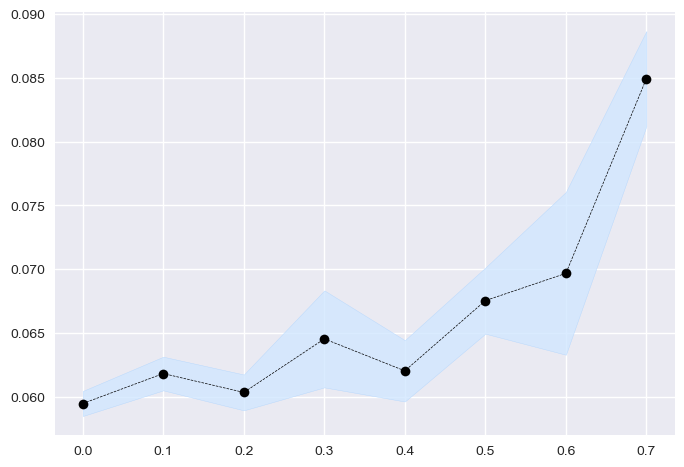

In [146]:
#with seaborn style
plot_spectral_curve(test_mse, shading=False, errbar=False)

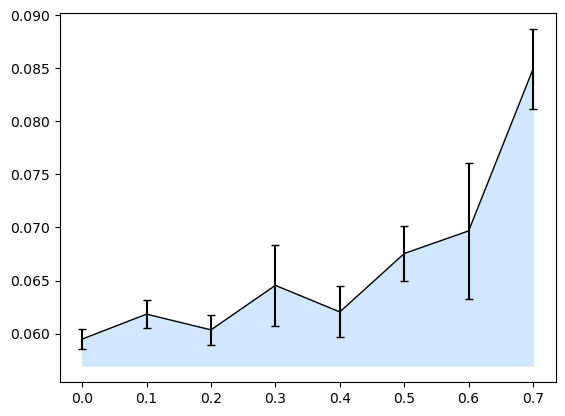

In [55]:
plot_spectral_curve(test_mse, errbar=True)

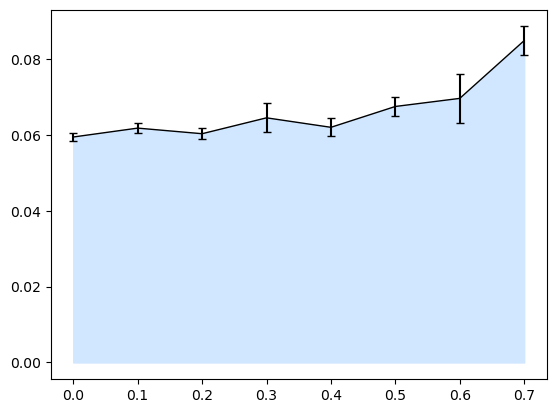

In [44]:
plot_spectral_curve(test_mse, zero_ylb=True)

## Plots and table for differentally expressed genes 

In [158]:
#diff expressed gene results have _de in there tags find idx of de gene
def find_diff_expres_idx_and_genes(raw_results_df):
    diff_expres_idx = []
    diff_expres_genes = []
    for i, t in enumerate(raw_results_df['Tags']):
        if '_de' in t.split(',')[0]:
            diff_expres_idx.append(i)
            diff_expres_genes.append(t.split('_')[0])

    return diff_expres_idx, diff_expres_genes

def find_de_mets_by_gene(diff_express_df, sp, model, metrics=['test_baseline/mse', 'test_de/mse']):
    '''find tabular metrics grouped by de gene for a given (sp) spectral param'''
    results = {}
    sp_subset = diff_express_df[diff_express_df['Group'] == f'test_{model}_{sp}']
    for g in sp_subset['diff_express_gene']:
        de_df_subset = sp_subset[sp_subset['diff_express_gene'] == g]
        results[g] = de_df_subset[metrics]
    return results

def create_de_table(de_results_dict, models_name_mapping):
    #tabular results 
    de_tab = pd.concat(de_results_dict)
    #fmt table
    cols = [models_name_mapping[l] for l in de_tab.columns]
    de_tab.columns = cols
    new_idx = [idx[0] for idx in de_tab.index]
    de_tab.index = new_idx
    de_tab = de_tab.T.sort_values(by=new_idx[0])
    return de_tab

In [97]:
diff_expres_idx, diff_expres_genes = find_diff_expres_idx_and_genes(df)
de_df = df.iloc[diff_expres_idx].copy(deep=True)
de_df['diff_express_gene'] = diff_expres_genes
#drop missing
de_df = de_df[~de_df['test_baseline/mse'].isna()]
de_df


,Name,Created,Group,Tags,test/mse,test_baseline/mse,test_de/mse,train/mse,val/mse,diff_express_gene
0,youthful-hill-37,2024-06-05T02:28:56.000Z,test_mlp_norman_0.0,"SLC4A1_de, eval, mlp, norman, replicate_0, spl...",NaN,0.383467,0.370128,NaN,NaN,SLC4A1
1,lemon-vortex-33,2024-06-05T02:13:27.000Z,test_mlp_norman_0.0,"SET_de, eval, mlp, norman, replicate_0, split_0.0",NaN,0.300423,0.296696,NaN,NaN,SET


### table of de results

In [185]:
sp = 0.0
model = 'mlp_norman'
models_name_mapping = {'test_baseline/mse': 'Null Benchmark', 'test_de/mse' : 'MLP Baseline'} #form de_df above
de_sp0 = find_de_mets_by_gene(de_df, sp, model)
de_sp0_tab = create_de_table(de_sp0)
de_sp0_tab

,SLC4A1,SET
MLP Baseline,0.370128,0.296696
Null Benchmark,0.383467,0.300423


### box plots of de results

In [200]:
def de_boxplot(de_results_dict, pert, models_name_mapping):
    y = de_results_dict[pert]
    assert len(y) == 1 #no reps 
    y = y.iloc[0].sort_values(ascending=True)
    cmap = plt.cm.get_cmap('tab20b', len(y)) 
    bar_colors = [cmap(i) for i in range(len(y))]
    bar_labels = [models_name_mapping[l] for l in y.index]
    plt.bar(bar_labels, y, label=bar_labels, 
            color=bar_colors, alpha=0.9
            )
    plt.xlabel(f'Perturbation {pert}')
    plt.ylabel('MSE')
    #plt.show()

C:\Users\Nik\AppData\Local\Temp\ipykernel_27080\170521812.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20b', len(y))


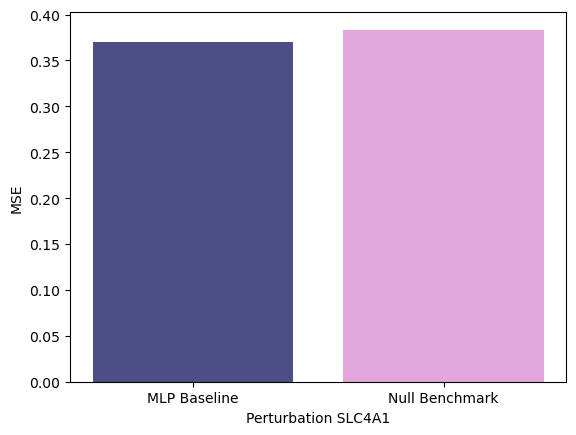

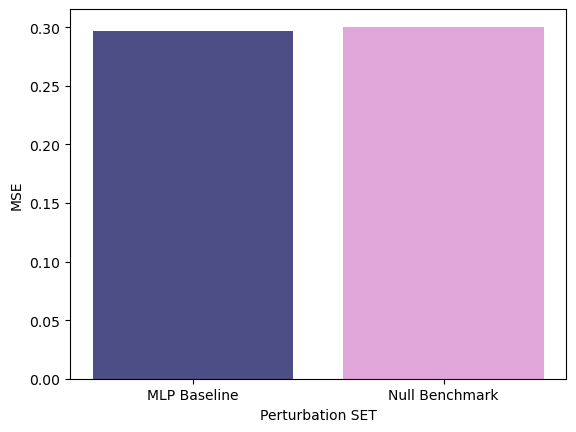

In [201]:
for pert in de_sp0.keys():
    de_boxplot(de_sp0, pert, models_name_mapping)
    plt.show()